<a href="https://colab.research.google.com/github/sambhajizambre/Project/blob/main/capstone%20project2%20multilabel%20cuisine%20classification%20rough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from plotly import tools
import re
from plotly.offline import init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS 
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=pd.read_csv('/content/drive/MyDrive/python/Datafiniti_Fast_Food_Restaurants_May19.csv')

In [9]:
df

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.396290,-104.696990,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.081350,-108.586890,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.091480,-108.554110,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.740440,-104.926360,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwd7U0T_7pvs4fz-fS_,2016-05-31T13:33:45Z,2018-12-03T09:04:19Z,1803 Carolina Ave,"American Restaurants,Caterers,Soul Food Restau...",Accommodation & Food Services,Bessemer,US,us/al/bessemer/1803carolinaave/785498836,33.399574,-86.951050,Church's Chicken Of Birmingham,35020,AL,http://www.yellowpages.com/bessemer-al/mip/chu...,http://www.churchs.com
9996,AV1XW1fF3D1zeR_xFKHL,2017-07-18T20:19:50Z,2018-12-02T00:08:36Z,8511 Cantilever Way Ste 105,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Accommodation & Food Services,Raleigh,US,us/nc/raleigh/8511cantileverwayste105/-1596320866,35.884500,-78.737541,Luxury Box,27613-6996,NC,https://www.bbb.org/us/nc/raleigh/profile/spor...,"http://www.theluxuryboxofraleigh.com,http://th..."
9997,AV5UVbkiRxPSIh2RiQxV,2017-09-05T23:05:50Z,2018-12-01T07:38:03Z,2601 Plover Rd,"Carry-out food,Hot dog restaurants,Fast Food R...",Accommodation & Food Services,Plover,US,us/wi/plover/2601ploverrd/-1161002137,44.453180,-89.543170,McDonald's,54467,WI,https://www.yellowpages.com/plover-wi/mip/mcdo...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
9998,AVwc9BxYByjofQCxj_GW,2016-03-31T02:43:12Z,2018-12-01T07:35:22Z,170 E Main St,"Carry-out food,Caterers,Restaurant delivery se...",Accommodation & Food Services,Hendersonville,US,us/tn/hendersonville/170emainst/-66712705,36.308262,-86.607339,Pizza Hut,37075,TN,https://foursquare.com/v/pizza-hut/4c5fffd43a3...,http://www.pizzahut.com


In [10]:
df.shape

(10000, 16)

In [11]:
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...


In [12]:
df.tail()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
9995,AVwd7U0T_7pvs4fz-fS_,2016-05-31T13:33:45Z,2018-12-03T09:04:19Z,1803 Carolina Ave,"American Restaurants,Caterers,Soul Food Restau...",Accommodation & Food Services,Bessemer,US,us/al/bessemer/1803carolinaave/785498836,33.399574,-86.951050,Church's Chicken Of Birmingham,35020,AL,http://www.yellowpages.com/bessemer-al/mip/chu...,http://www.churchs.com
9996,AV1XW1fF3D1zeR_xFKHL,2017-07-18T20:19:50Z,2018-12-02T00:08:36Z,8511 Cantilever Way Ste 105,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Accommodation & Food Services,Raleigh,US,us/nc/raleigh/8511cantileverwayste105/-1596320866,35.884500,-78.737541,Luxury Box,27613-6996,NC,https://www.bbb.org/us/nc/raleigh/profile/spor...,"http://www.theluxuryboxofraleigh.com,http://th..."
9997,AV5UVbkiRxPSIh2RiQxV,2017-09-05T23:05:50Z,2018-12-01T07:38:03Z,2601 Plover Rd,"Carry-out food,Hot dog restaurants,Fast Food R...",Accommodation & Food Services,Plover,US,us/wi/plover/2601ploverrd/-1161002137,44.453180,-89.543170,McDonald's,54467,WI,https://www.yellowpages.com/plover-wi/mip/mcdo...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
9998,AVwc9BxYByjofQCxj_GW,2016-03-31T02:43:12Z,2018-12-01T07:35:22Z,170 E Main St,"Carry-out food,Caterers,Restaurant delivery se...",Accommodation & Food Services,Hendersonville,US,us/tn/hendersonville/170emainst/-66712705,36.308262,-86.607339,Pizza Hut,37075,TN,https://foursquare.com/v/pizza-hut/4c5fffd43a3...,http://www.pizzahut.com
9999,AVzA_GF53D1zeR_xBDVW,2017-06-19T15:33:04Z,2018-12-01T00:03:40Z,3400 Westgate Drive,"Fast Food Restaurant,Restaurants",Accommodation & Food Services,Durham,US,us/nc/durham/3400westgatedrive/-2061630068,35.965869,-78.963366,Burger King,27707-2696,NC,https://foursquare.com/v/burger-king/4c4b28765...,http://www.bk.com


In [13]:
df.describe()

,latitude,longitude
count,10000.000000,10000.000000
mean,37.298215,-93.284547
std,5.566995,16.421424
min,19.639560,-159.464310
25%,33.850652,-98.342758
50%,37.490189,-86.677452
75%,40.808905,-81.803061
max,64.856880,-71.082180


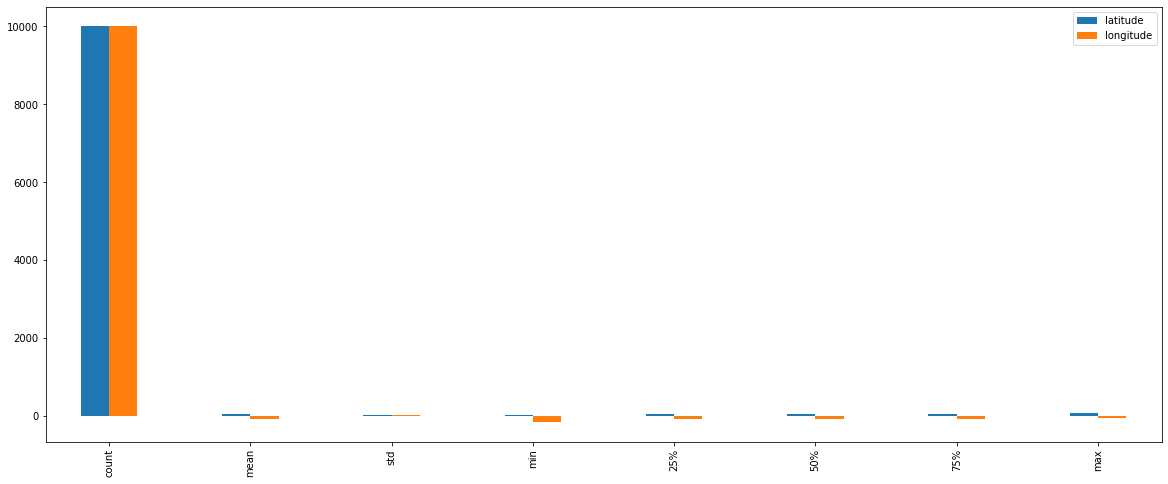

In [14]:
df.describe().plot(kind='bar',figsize=(20,8),width=(0.4))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   dateAdded          10000 non-null  object 
 2   dateUpdated        10000 non-null  object 
 3   address            10000 non-null  object 
 4   categories         10000 non-null  object 
 5   primaryCategories  10000 non-null  object 
 6   city               10000 non-null  object 
 7   country            10000 non-null  object 
 8   keys               10000 non-null  object 
 9   latitude           10000 non-null  float64
 10  longitude          10000 non-null  float64
 11  name               10000 non-null  object 
 12  postalCode         10000 non-null  object 
 13  province           10000 non-null  object 
 14  sourceURLs         10000 non-null  object 
 15  websites           9918 non-null   object 
dtypes: float64(2), object(1

In [16]:
df.isnull().sum()

id                    0
dateAdded             0
dateUpdated           0
address               0
categories            0
primaryCategories     0
city                  0
country               0
keys                  0
latitude              0
longitude             0
name                  0
postalCode            0
province              0
sourceURLs            0
websites             82
dtype: int64

In [17]:
df1=df.groupby('city')
df1.first()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
city,,,,,,,,,,,,,,,
Abbeville,AVweMIYa_7pvs4fzA0sj,2016-07-06T20:05:27Z,2019-03-21T08:16:55Z,644 Ozark Rd,"Delis And Delicatessens,Restaurant,Take Out Re...",Accommodation & Food Services,US,us/al/abbeville/644ozarkrd/-891525969,31.554300,-85.269000,SUBWAY,36310,AL,http://tripadvisor.com/Restaurant_Review-g2897...,http://www.subway.com/
Aberdeen,AWitvnrbIxWefVJwE_LU,2019-02-02T10:01:50Z,2019-04-18T22:11:41Z,1664 Nc Highway 5,"American Restaurants,Takeout,Burgers,Fast Food...",Accommodation & Food Services,US,us/nc/aberdeen/1664nchighway5/696490760,35.164600,-79.471695,Hardee's,28315,NC,https://www.dexknows.com/business_profiles/har...,http://hardees.com
Abilene,AVwdZLSx_7pvs4fz5a7N,2015-10-23T00:21:30Z,2019-04-15T07:08:49Z,4001 N 1st St,"Delis And Delicatessens,Sandwich Place and Fas...",Accommodation & Food Services,US,us/tx/abilene/4001n1stst/-891525969,32.452081,-99.771632,Subway,79603,TX,http://www.yellowbook.com/profile/subway_16314...,"http://www.subway.com/,http://subway.com/"
Abingdon,AVwdbK7WkufWRAb55w5n,2016-03-21T00:00:58Z,2019-04-07T15:23:59Z,401 Constant Friendship Blvd,"Delis And Delicatessens,Restaurant,Carry-out f...",Accommodation & Food Services,US,us/md/abingdon/401constantfriendshipblvd/-8915...,39.462716,-76.314980,Subway,21009,MD,http://www.citysearch.com/profile/43287708/abi...,http://www.subway.com/
Acworth,AVzA_qrd3D1zeR_xBDnQ,2017-06-19T15:35:34Z,2019-05-16T21:01:55Z,3295 Cobb Pkwy Nw,"Carry-out food,Caterers,American Restaurant,Am...",Accommodation & Food Services,US,us/ga/acworth/3295cobbpkwynw/-345832572,34.053500,-84.703800,Chick-Fil-A,30101,GA,http://www.yellowbook.com/profile/chick-fil-a_...,"http://www.chick-fil-a.com/,http://www.chick-f..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zanesville,AWlVTN8t3-Khe5l_5t2m,2019-03-06T18:50:03Z,2019-05-12T15:05:59Z,3217 Maple Avenue,"Mexican,Mexican Restaurants,Take-out,Lacto,Fas...",Accommodation & Food Services,US,us/oh/zanesville/3217mapleavenue/-1760681137,39.980740,-82.019050,Hot Head Burritos,43701,OH,https://www.yellowpages.com/zanesville-oh/mip/...,http://hotheadburritos.com
Zebulon,AWkq7ZGia4HuVbedks8n,2019-02-26T17:22:21Z,2019-03-02T09:00:27Z,7811 Highway 19 S,"Ice Cream and Frozen Desserts,Fast Food Restau...",Accommodation & Food Services,US,us/ga/zebulon/7811highway19s/-1914135427,33.095330,-84.344810,Dairy Queen Grill Chill,30295,GA,https://www.yellowpages.com/zebulon-ga/mip/dai...,https://www.dairyqueen.com/us-en/Locator/Detai...
Zelienople,AVwc__5ZIN2L1WUfrK_D,2016-10-23T21:50:48Z,2019-04-01T18:48:20Z,502 E Grandview Ave,"Pizza,Restaurant,Take Out Restaurants,Fast Foo...",Accommodation & Food Services,US,us/pa/zelienople/502egrandviewave/-1188936695,40.797900,-80.131900,Fox's Pizza Den,16063,PA,https://www.allmenus.com/pa/zelienople/67772-f...,http://www.foxspizzaden.com/


In [18]:
df3=df1.plot[:5](kind='bar',figsize=(20,8),width=(0.4))

TypeError: ignored

In [19]:
n=df.nunique(axis=0)
n

id                   10000
dateAdded             9455
dateUpdated           9327
address               9954
categories            5670
primaryCategories        1
city                  2810
country                  1
keys                 10000
latitude              9870
longitude             9886
name                  1545
postalCode            5310
province                47
sourceURLs           10000
websites              6215
dtype: int64

In [20]:
df['categories'].str.contains('Restaurant').sum()

9802

In [21]:
df['categories'].unique()


array(['Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants',
       'Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants',
       'Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants',
       ...,
       'American Restaurants,Caterers,Soul Food Restaurants,Fast Food Restaurants,Take Out Restaurants,Breakfast Brunch and Lunch Restaurants,,Breakfast Brunch & Lunch Restaurants,,Chicken Restaurants,Family Style Restaurants,Restaurants',
       'Mexican Restaurants,Caterers,Delicatessens,Irish Restaurants,Fast Food Restaurants,Take Out Restaurants,Sports Bar,Restaurants,American Restaurants,Restaurant,Hamburgers and Hot Dogs,Bars,Sandwich Shops',
       'Carry-out food,Hot dog restaurants,Fast Food Restaurant,American restaurants,Hamburger restaurants,Gourmet shop restaurants,Fast Food Restaurants,Take Out Restaurants,Karaoke,Hamburgers and Hot Dogs,Restaurants'],
      dtype=object)

In [22]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'sourceURLs', 'websites'],
      dtype='object')

In [23]:
df2=df.drop('country',axis=1)
df2

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,us/co/greeley/255511thavenue/554191587,40.396290,-104.696990,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/car...,https://www.carlsjr.com/?utm_source=Yextandutm...
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,us/co/grandjunction/2513highway6and50/1550891556,39.081350,-108.586890,Del Taco,81505,CO,http://www.citysearch.com/profile/772076870/gr...,http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,us/co/grandjunction/1125pattersonroad/-2137447852,39.091480,-108.554110,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/...,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,us/co/aurora/3455nsalidacourt/1143321601,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chip...,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,us/co/denver/5225ecolfaxavenue/-864103396,39.740440,-104.926360,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco...,https://locations.tacobell.com/co/denver/5225-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwd7U0T_7pvs4fz-fS_,2016-05-31T13:33:45Z,2018-12-03T09:04:19Z,1803 Carolina Ave,"American Restaurants,Caterers,Soul Food Restau...",Accommodation & Food Services,Bessemer,us/al/bessemer/1803carolinaave/785498836,33.399574,-86.951050,Church's Chicken Of Birmingham,35020,AL,http://www.yellowpages.com/bessemer-al/mip/chu...,http://www.churchs.com
9996,AV1XW1fF3D1zeR_xFKHL,2017-07-18T20:19:50Z,2018-12-02T00:08:36Z,8511 Cantilever Way Ste 105,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Accommodation & Food Services,Raleigh,us/nc/raleigh/8511cantileverwayste105/-1596320866,35.884500,-78.737541,Luxury Box,27613-6996,NC,https://www.bbb.org/us/nc/raleigh/profile/spor...,"http://www.theluxuryboxofraleigh.com,http://th..."
9997,AV5UVbkiRxPSIh2RiQxV,2017-09-05T23:05:50Z,2018-12-01T07:38:03Z,2601 Plover Rd,"Carry-out food,Hot dog restaurants,Fast Food R...",Accommodation & Food Services,Plover,us/wi/plover/2601ploverrd/-1161002137,44.453180,-89.543170,McDonald's,54467,WI,https://www.yellowpages.com/plover-wi/mip/mcdo...,"http://mcdonalds.com,http://www.mcdonalds.com/..."
9998,AVwc9BxYByjofQCxj_GW,2016-03-31T02:43:12Z,2018-12-01T07:35:22Z,170 E Main St,"Carry-out food,Caterers,Restaurant delivery se...",Accommodation & Food Services,Hendersonville,us/tn/hendersonville/170emainst/-66712705,36.308262,-86.607339,Pizza Hut,37075,TN,https://foursquare.com/v/pizza-hut/4c5fffd43a3...,http://www.pizzahut.com
